In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import refinitiv.data as rd

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator
from collections import Counter


rd.open_session()

<refinitiv.data.session.Definition object at 0x1d814ae8af0 {name='workspace'}>

In [2]:
#acc="SCREEN(U(IN(Equity(active,public,primary))/*UNV:Public*/), IN(TR.HQCountryCode,""CL""), IN(TR.GICSIndustryCode,""302010""), CURN=USD)"

acc="SCREEN(U(IN(Equity(active,public,primary))/*UNV:Public*/),  IN(TR.GICSIndustryCode,""302010""), CURN=USD)"

In [3]:
df = rd.get_data(
    acc,
    fields = [
        'TR.CommonName',
        'TR.HeadquartersCountry',
        'TR.TRESGScore.date',
        'TR.TRESGScore',
        'TR.TRESGCScore',
        'TR.TRESGCControversiesScore',
        'TR.TRESGResourceUseScore',
        'TR.TRESGEmissionsScore',
        'TR.TRESGInnovationScore',
        'TR.TRESGWorkforceScore',
        'TR.TRESGHumanRightsScore',
        'TR.TRESGCommunityScore',
        'TR.TRESGProductResponsibilityScore',
        'TR.TRESGManagementScore',
        'TR.TRESGShareholdersScore',
        'TR.TRESGCSRStrategyScore'
    ],
    parameters = {'Period':'FY0','Frq':'FY','SDate':'0','EDate':'0'}
)

In [54]:
df

,Country of Headquarters,ESG Controversies Score,Resource Use Score,Emissions Score,Environmental Innovation Score,Workforce Score,Human Rights Score,Community Score,Product Responsibility Score,Management Score,Shareholders Score,CSR Strategy Score
0,Australia,100.000000,23.831776,50.000000,0.000000,67.727273,66.000000,67.272727,43.636364,77.682927,67.682927,90.469208
1,Belgium,25.000000,81.018519,83.027523,92.241379,73.660714,90.625000,54.017857,66.216216,91.666667,63.888889,91.509434
2,Brazil,100.000000,55.092593,63.761468,92.241379,27.232143,65.104167,69.196429,19.819820,48.561151,18.345324,71.653543
3,Canada,100.000000,0.728155,4.481132,0.000000,11.090067,38.023256,33.194444,4.880952,18.730675,7.096978,0.000000
4,Chile,100.000000,66.544184,64.567466,52.272727,84.081515,66.609133,52.356151,75.611326,34.042553,44.148936,51.630435
5,China,100.000000,44.107390,58.165138,17.394327,56.110390,13.198958,37.844156,39.975430,52.271277,27.487801,54.289588
6,Cyprus,100.000000,1.388889,21.559633,0.000000,17.410714,0.000000,29.910714,30.630631,73.076923,88.461538,55.000000
7,Denmark,63.750000,67.289720,63.761468,17.741935,59.090909,78.000000,78.863636,71.136364,81.060606,30.303030,79.615385
8,Finland,100.000000,58.411215,54.128440,13.306452,27.727273,78.000000,49.090909,87.727273,45.569620,77.848101,56.849315
9,France,73.148148,86.569747,74.143448,49.761348,73.262987,73.334751,41.017316,50.154245,46.822277,57.366457,34.662063


In [50]:
#elimina filas con valores nulos
df = df.dropna()
df

,Country of Headquarters,ESG Controversies Score,Resource Use Score,Emissions Score,Environmental Innovation Score,Workforce Score,Human Rights Score,Community Score,Product Responsibility Score,Management Score,Shareholders Score,CSR Strategy Score
0,Australia,100.000000,23.831776,50.000000,0.000000,67.727273,66.000000,67.272727,43.636364,77.682927,67.682927,90.469208
1,Belgium,25.000000,81.018519,83.027523,92.241379,73.660714,90.625000,54.017857,66.216216,91.666667,63.888889,91.509434
2,Brazil,100.000000,55.092593,63.761468,92.241379,27.232143,65.104167,69.196429,19.819820,48.561151,18.345324,71.653543
3,Canada,100.000000,0.728155,4.481132,0.000000,11.090067,38.023256,33.194444,4.880952,18.730675,7.096978,0.000000
4,Chile,100.000000,66.544184,64.567466,52.272727,84.081515,66.609133,52.356151,75.611326,34.042553,44.148936,51.630435
5,China,100.000000,44.107390,58.165138,17.394327,56.110390,13.198958,37.844156,39.975430,52.271277,27.487801,54.289588
6,Cyprus,100.000000,1.388889,21.559633,0.000000,17.410714,0.000000,29.910714,30.630631,73.076923,88.461538,55.000000
7,Denmark,63.750000,67.289720,63.761468,17.741935,59.090909,78.000000,78.863636,71.136364,81.060606,30.303030,79.615385
8,Finland,100.000000,58.411215,54.128440,13.306452,27.727273,78.000000,49.090909,87.727273,45.569620,77.848101,56.849315
9,France,73.148148,86.569747,74.143448,49.761348,73.262987,73.334751,41.017316,50.154245,46.822277,57.366457,34.662063


In [6]:
#df.to_csv('ESG_11.csv', index=False)

In [2]:
df=pd.read_csv('ESG_11.csv')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Instrument                      107 non-null    object 
 1   Company Common Name             107 non-null    object 
 2   Country of Headquarters         107 non-null    object 
 3   Date                            107 non-null    object 
 4   ESG Score                       107 non-null    float64
 5   ESG Combined Score              107 non-null    float64
 6   ESG Controversies Score         107 non-null    float64
 7   Resource Use Score              107 non-null    float64
 8   Emissions Score                 107 non-null    float64
 9   Environmental Innovation Score  107 non-null    float64
 10  Workforce Score                 107 non-null    float64
 11  Human Rights Score              107 non-null    float64
 12  Community Score                 107 

In [96]:
#summary statistics
df.describe()


,ESG Score,ESG Combined Score,ESG Controversies Score,Resource Use Score,Emissions Score,Environmental Innovation Score,Workforce Score,Human Rights Score,Community Score,Product Responsibility Score,Management Score,Shareholders Score,CSR Strategy Score
count,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000
mean,48.874313,46.766774,90.960540,50.023255,50.932827,27.667812,51.613811,45.333446,51.656590,50.343539,52.343400,41.381121,52.340217
std,20.369079,18.749582,22.610673,30.392298,29.375668,32.460649,29.301314,32.210785,28.659655,28.364423,26.620530,27.857864,28.740210
min,8.145847,8.145847,2.777778,0.000000,0.000000,0.000000,0.446429,0.000000,0.446429,4.761905,1.979742,0.101538,0.000000
25%,32.931479,32.931479,100.000000,23.254154,26.146789,0.000000,26.932223,12.500000,27.703373,26.818182,29.055479,16.399345,30.209062
50%,48.521759,45.990741,100.000000,50.000000,50.917431,8.870968,51.339286,45.000000,53.181818,50.000000,55.288462,40.725806,50.000000
75%,65.433688,60.505928,100.000000,78.504673,78.899083,57.758621,77.678571,66.000000,75.677760,73.071253,73.418395,62.159507,76.062323
max,87.480886,84.086349,100.000000,98.611111,99.541284,92.241379,99.553571,91.279070,99.553571,99.099099,95.186640,99.038462,99.224260


In [3]:
#crea un nuevo dataframe sin las columnas,0
df2 = df.drop(df.columns[[0,1,2,3,4,5,6]], axis=1)



In [4]:
df2

,Resource Use Score,Emissions Score,Environmental Innovation Score,Workforce Score,Human Rights Score,Community Score,Product Responsibility Score,Management Score,Shareholders Score,CSR Strategy Score
0,64.351852,40.825688,57.758621,52.232143,65.104167,24.553571,40.090090,16.919192,66.414141,15.079365
1,9.813084,11.467890,26.612903,38.636364,32.500000,43.181818,88.636364,9.268930,56.933565,63.311537
2,93.981481,81.192661,0.000000,54.017857,40.104167,50.446429,88.288288,22.983871,40.725806,57.272727
3,23.611111,51.834862,0.000000,51.339286,35.937500,96.875000,34.234234,72.638889,41.527778,76.062323
4,87.383178,70.183486,26.612903,86.818182,51.000000,78.636364,63.181818,83.287293,50.966851,90.363128
...,...,...,...,...,...,...,...,...,...,...
102,38.785047,18.807339,0.000000,27.727273,12.500000,59.545455,55.909091,4.385965,50.184672,35.727878
103,88.317757,99.541284,91.129032,85.909091,38.500000,31.363636,92.727273,74.838412,21.929825,68.839201
104,60.280374,23.394495,0.000000,35.000000,41.500000,30.454545,79.545455,52.001741,3.539310,35.544138
105,7.870370,5.045872,26.724138,14.732143,27.083333,54.910714,38.288288,56.836649,3.348277,7.616361


In [10]:
#agrupa por pais y calcula la media desde la columna 6 en adelante
df_grouped = df2.groupby('Country of Headquarters').mean()
df_grouped


,ESG Controversies Score,Resource Use Score,Emissions Score,Environmental Innovation Score,Workforce Score,Human Rights Score,Community Score,Product Responsibility Score,Management Score,Shareholders Score,CSR Strategy Score
Country of Headquarters,,,,,,,,,,,
Australia,100.0,23.831776,50.0,0.0,67.727273,66.0,67.272727,43.636364,77.682927,67.682927,90.469208
Belgium,25.0,81.018519,83.027523,92.241379,73.660714,90.625,54.017857,66.216216,91.666667,63.888889,91.509434
Brazil,100.0,55.092593,63.761468,92.241379,27.232143,65.104167,69.196429,19.81982,48.561151,18.345324,71.653543
Canada,100.0,0.728155,4.481132,0.0,11.090067,38.023256,33.194444,4.880952,18.730675,7.096978,0.0
Chile,100.0,66.544184,64.567466,52.272727,84.081515,66.609133,52.356151,75.611326,34.042553,44.148936,51.630435
China,100.0,44.10739,58.165138,17.394327,56.11039,13.198958,37.844156,39.97543,52.271277,27.487801,54.289588
Cyprus,100.0,1.388889,21.559633,0.0,17.410714,0.0,29.910714,30.630631,73.076923,88.461538,55.0
Denmark,63.75,67.28972,63.761468,17.741935,59.090909,78.0,78.863636,71.136364,81.060606,30.30303,79.615385
Finland,100.0,58.411215,54.12844,13.306452,27.727273,78.0,49.090909,87.727273,45.56962,77.848101,56.849315


In [11]:
#convierte df_grouped en un dataframe
df_grouped = df_grouped.reset_index()
df_grouped


,Country of Headquarters,ESG Controversies Score,Resource Use Score,Emissions Score,Environmental Innovation Score,Workforce Score,Human Rights Score,Community Score,Product Responsibility Score,Management Score,Shareholders Score,CSR Strategy Score
0,Australia,100.0,23.831776,50.0,0.0,67.727273,66.0,67.272727,43.636364,77.682927,67.682927,90.469208
1,Belgium,25.0,81.018519,83.027523,92.241379,73.660714,90.625,54.017857,66.216216,91.666667,63.888889,91.509434
2,Brazil,100.0,55.092593,63.761468,92.241379,27.232143,65.104167,69.196429,19.81982,48.561151,18.345324,71.653543
3,Canada,100.0,0.728155,4.481132,0.0,11.090067,38.023256,33.194444,4.880952,18.730675,7.096978,0.0
4,Chile,100.0,66.544184,64.567466,52.272727,84.081515,66.609133,52.356151,75.611326,34.042553,44.148936,51.630435
5,China,100.0,44.10739,58.165138,17.394327,56.11039,13.198958,37.844156,39.97543,52.271277,27.487801,54.289588
6,Cyprus,100.0,1.388889,21.559633,0.0,17.410714,0.0,29.910714,30.630631,73.076923,88.461538,55.0
7,Denmark,63.75,67.28972,63.761468,17.741935,59.090909,78.0,78.863636,71.136364,81.060606,30.30303,79.615385
8,Finland,100.0,58.411215,54.12844,13.306452,27.727273,78.0,49.090909,87.727273,45.56962,77.848101,56.849315
9,France,73.148148,86.569747,74.143448,49.761348,73.262987,73.334751,41.017316,50.154245,46.822277,57.366457,34.662063


In [12]:
#guarda el dataframe en un archivo csv
#df_grouped.to_csv('ESG.csv', index=False)


In [2]:
df=pd.read_csv('ESG.csv')

In [7]:
df1=df.iloc[:,2:]

In [8]:
df1

,Resource Use Score,Emissions Score,Environmental Innovation Score,Workforce Score,Human Rights Score,Community Score,Product Responsibility Score,Management Score,Shareholders Score,CSR Strategy Score
0,23.831776,50.000000,0.000000,67.727273,66.000000,67.272727,43.636364,77.682927,67.682927,90.469208
1,81.018519,83.027523,92.241379,73.660714,90.625000,54.017857,66.216216,91.666667,63.888889,91.509434
2,55.092593,63.761468,92.241379,27.232143,65.104167,69.196429,19.819820,48.561151,18.345324,71.653543
3,0.728155,4.481132,0.000000,11.090067,38.023256,33.194444,4.880952,18.730675,7.096978,0.000000
4,66.544184,64.567466,52.272727,84.081515,66.609133,52.356151,75.611326,34.042553,44.148936,51.630435
5,44.107390,58.165138,17.394327,56.110390,13.198958,37.844156,39.975430,52.271277,27.487801,54.289588
6,1.388889,21.559633,0.000000,17.410714,0.000000,29.910714,30.630631,73.076923,88.461538,55.000000
7,67.289720,63.761468,17.741935,59.090909,78.000000,78.863636,71.136364,81.060606,30.303030,79.615385
8,58.411215,54.128440,13.306452,27.727273,78.000000,49.090909,87.727273,45.569620,77.848101,56.849315
9,86.569747,74.143448,49.761348,73.262987,73.334751,41.017316,50.154245,46.822277,57.366457,34.662063


In [29]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer
x = MinMaxScaler().fit_transform(df2)
x = pd.DataFrame(x, columns=df2.columns)
x.describe()

,Resource Use Score,Emissions Score,Environmental Innovation Score,Workforce Score,Human Rights Score,Community Score,Product Responsibility Score,Management Score,Shareholders Score,CSR Strategy Score
count,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000
mean,0.507278,0.511675,0.299950,0.516283,0.496647,0.516715,0.483178,0.540343,0.417231,0.527494
std,0.308204,0.295110,0.351910,0.295653,0.352882,0.289179,0.300671,0.285607,0.281572,0.289649
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.235817,0.262673,0.000000,0.267244,0.136943,0.275025,0.233803,0.290491,0.164729,0.304452
50%,0.507042,0.511521,0.096171,0.513514,0.492994,0.532105,0.479536,0.571940,0.410608,0.503909
75%,0.796104,0.792627,0.626168,0.779279,0.723057,0.759091,0.724098,0.766452,0.627248,0.766570
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Resource Use Score              107 non-null    float64
 1   Emissions Score                 107 non-null    float64
 2   Environmental Innovation Score  107 non-null    float64
 3   Workforce Score                 107 non-null    float64
 4   Human Rights Score              107 non-null    float64
 5   Community Score                 107 non-null    float64
 6   Product Responsibility Score    107 non-null    float64
 7   Management Score                107 non-null    float64
 8   Shareholders Score              107 non-null    float64
 9   CSR Strategy Score              107 non-null    float64
dtypes: float64(10)
memory usage: 8.5 KB


In [30]:
#utiliza la función nclub para determinar el número óptimo de clusters 
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN, SpectralClustering
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score

def nclub(X, linkage='ward', affinity='euclidean'):
    scores = []
    for k in range(2, 11):
        modelo = KMeans(n_clusters=k)
        modelo.fit(X)
        score = silhouette_score(X, modelo.labels_)
        scores.append(score)
    return scores

scores = nclub(x)
scores


[0.2753924343443096,
 0.1915269033140354,
 0.1889783646334503,
 0.16605148036267167,
 0.1724417248994608,
 0.16455488421157788,
 0.14622036428962468,
 0.13993824804998284,
 0.16094946518920691]

In [32]:
#cluster con algoritmo kmeans

modelo_kmeans = KMeans(n_clusters=2)
modelo_kmeans.fit(x)
pred_kmeans = modelo_kmeans.predict(x)
Counter(pred_kmeans)



Counter({1: 60, 0: 47})

In [33]:
cluster=pd.DataFrame(modelo_kmeans.cluster_centers_.reshape(2,10),columns=x.columns)

In [34]:
cluster=cluster.T

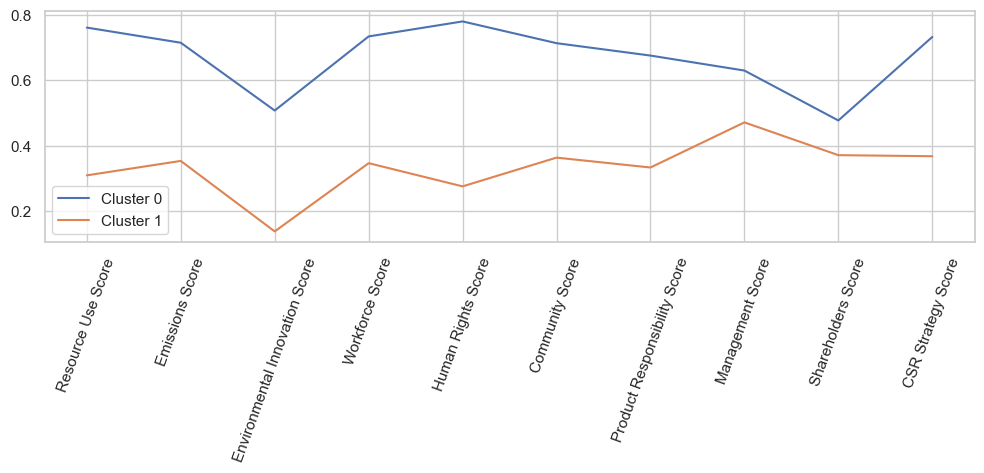

In [35]:
#grafica valores medios de cada cluster
#quitar cuadricula
sns.set(style="whitegrid")
plt.figure(figsize=(12,3))
plt.plot(cluster[0],label="Cluster 0")
plt.plot(cluster[1],label="Cluster 1")
#plt.plot(cluster[2],label="Cluster 2")
#plt.plot(cluster[3],label="Cluster 3")
#plt.plot(cluster[4],label="Cluster 4")
#plt.plot(cluster[5],label="Cluster 5")
#texto eje x diagonal
plt.xticks(rotation=70)
plt.legend()
plt.show()

In [36]:
#crea columna con el cluster asignado
df['Cluster'] = pred_kmeans

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Instrument                      107 non-null    object 
 1   Company Common Name             107 non-null    object 
 2   Country of Headquarters         107 non-null    object 
 3   Date                            107 non-null    object 
 4   ESG Score                       107 non-null    float64
 5   ESG Combined Score              107 non-null    float64
 6   ESG Controversies Score         107 non-null    float64
 7   Resource Use Score              107 non-null    float64
 8   Emissions Score                 107 non-null    float64
 9   Environmental Innovation Score  107 non-null    float64
 10  Workforce Score                 107 non-null    float64
 11  Human Rights Score              107 non-null    float64
 12  Community Score                 107 

In [41]:
df3=df.copy()

In [59]:
#crea columna env como el producto de las columnas 7,8 y 9 con 0.071, 0.071 y 0.062
df3['env'] = (df.iloc[:,7]*0.132 + df.iloc[:,8]*0.124 + df.iloc[:,9]*0.041)/(0.297)
df3['gov'] = (df.iloc[:,14]*0.05 + df.iloc[:,15]*0.165 + df.iloc[:,16]*0.033)/(0.248)
df3['soc'] = (df.iloc[:,10]*0.103 + df.iloc[:,11]*0.149 + df.iloc[:,12]*0.083 + df.iloc[:,13]*0.121)/(0.455)


In [60]:
df3

,Instrument,Company Common Name,Country of Headquarters,Date,ESG Score,ESG Combined Score,ESG Controversies Score,Resource Use Score,Emissions Score,Environmental Innovation Score,...,Human Rights Score,Community Score,Product Responsibility Score,Management Score,Shareholders Score,CSR Strategy Score,Cluster,env,gov,soc
0,MBWS.PA,Marie Brizard Wine and Spirits SA,France,2022-12-31,44.453601,44.453601,100.0,64.351852,40.825688,57.758621,...,65.104167,24.553571,40.090090,16.919192,66.414141,15.079365,1,53.619304,49.604484,48.284129
1,STZ.N,Constellation Brands Inc,United States of America,2023-02-28,33.359761,33.359761,100.0,9.813084,11.467890,26.612903,...,32.500000,43.181818,88.636364,9.268930,56.933565,63.311537,1,12.823146,48.172441,50.837662
2,0506.HK,China Foods Ltd,Hong Kong,2022-12-31,56.543391,56.543391,100.0,93.981481,81.192661,0.000000,...,40.104167,50.446429,88.288288,22.983871,40.725806,57.272727,0,75.668167,39.350611,58.042410
3,HEIN.KL,Heineken Malaysia Bhd,Malaysia,2022-12-31,48.866266,48.866266,100.0,23.611111,51.834862,0.000000,...,35.937500,96.875000,34.234234,72.638889,41.527778,76.062323,1,32.135319,52.395502,50.166157
4,FRAS.KL,Fraser & Neave Holdings Bhd,Malaysia,2023-09-30,71.250658,71.250658,100.0,87.383178,70.183486,26.612903,...,51.000000,78.636364,63.181818,83.287293,50.966851,90.363128,0,71.812999,62.725316,67.501299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,605499.SS,Eastroc Beverage Group Co Ltd,China,2023-12-31,28.237594,28.237594,100.0,38.785047,18.807339,0.000000,...,12.500000,59.545455,55.909091,4.385965,50.184672,35.727878,1,25.090021,39.027376,36.100400
103,9633.HK,Nongfu Spring Co Ltd,China,2023-12-31,71.851878,71.851878,100.0,88.317757,99.541284,91.129032,...,38.500000,31.363636,92.727273,74.838412,21.929825,68.839201,0,93.391763,38.838852,62.435864
104,NAPA.N,Duckhorn Portfolio Inc,United States of America,2023-07-31,42.706158,42.706158,100.0,60.280374,23.394495,0.000000,...,41.500000,30.454545,79.545455,52.001741,3.539310,35.544138,1,36.558676,17.568668,48.222478
105,ZVIA.N,Zevia PBC,United States of America,2022-12-31,27.275185,27.275185,100.0,7.870370,5.045872,26.724138,...,27.083333,54.910714,38.288288,56.836649,3.348277,7.616361,1,9.293827,14.700153,32.402856


In [57]:
df3[df3["Country of Headquarters"]=="Chile"]  

,Instrument,Company Common Name,Country of Headquarters,Date,ESG Score,ESG Combined Score,ESG Controversies Score,Resource Use Score,Emissions Score,Environmental Innovation Score,Workforce Score,Human Rights Score,Community Score,Product Responsibility Score,Management Score,Shareholders Score,CSR Strategy Score,Cluster,env
43,ANDINAB.SN,Embotelladora Andina SA,Chile,2022-12-31,81.455039,81.455039,100.0,85.648148,93.119266,57.758621,91.517857,90.625000,58.482143,99.099099,73.404255,37.234043,77.173913,0,84.917333
49,CCU.SN,Compania Cervecerias Unidas SA,Chile,2022-12-31,41.772038,41.772038,100.0,44.907407,50.000000,0.000000,92.410714,47.916667,43.750000,41.891892,9.574468,39.361702,23.913043,1,40.834269
52,CONCHATORO.SN,Concha y Toro Winery Inc,Chile,2022-12-31,63.217437,63.217437,100.0,66.203704,64.678899,92.241379,85.267857,65.104167,80.803571,66.216216,26.595745,60.638298,64.130435,0,69.161512
62,EMBONORB.SN,Coca Cola Embonor SA,Chile,2021-12-31,55.515098,55.515098,100.0,69.417476,50.471698,59.090909,67.129630,62.790698,26.388889,95.238095,26.595745,39.361702,41.304348,0,60.081901


In [61]:
df4=df3.iloc[:,18:]

In [62]:
df4

,env,gov,soc
0,53.619304,49.604484,48.284129
1,12.823146,48.172441,50.837662
2,75.668167,39.350611,58.042410
3,32.135319,52.395502,50.166157
4,71.812999,62.725316,67.501299
...,...,...,...
102,25.090021,39.027376,36.100400
103,93.391763,38.838852,62.435864
104,36.558676,17.568668,48.222478
105,9.293827,14.700153,32.402856


In [63]:
scores = nclub(df4)
scores

[0.3964005165732458,
 0.37332261362249003,
 0.31339020137128326,
 0.3419685950277238,
 0.28763173972784656,
 0.3004489720546587,
 0.29733796512309596,
 0.30169810811982367,
 0.30480772567834863]

In [64]:
modelo_kmeans = KMeans(n_clusters=2)
modelo_kmeans.fit(df4)
pred_kmeans = modelo_kmeans.predict(df4)
Counter(pred_kmeans)

Counter({0: 55, 1: 52})

In [66]:
cluster=pd.DataFrame(modelo_kmeans.cluster_centers_.reshape(2,3),columns=df4.columns)
cluster=cluster.T

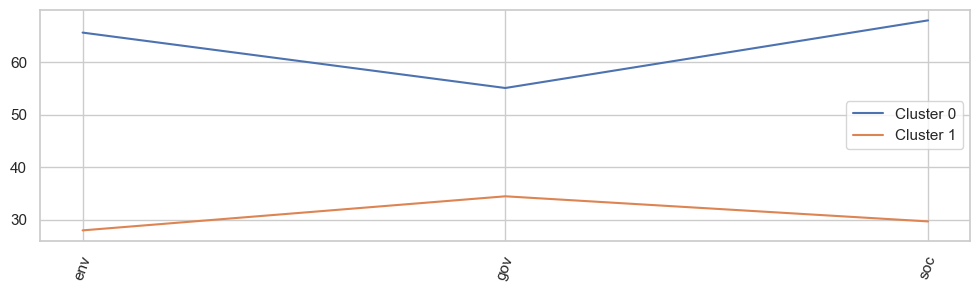

In [67]:
#grafica valores medios de cada cluster
#quitar cuadricula
sns.set(style="whitegrid")
plt.figure(figsize=(12,3))
plt.plot(cluster[0],label="Cluster 0")
plt.plot(cluster[1],label="Cluster 1")
#plt.plot(cluster[2],label="Cluster 2")
#plt.plot(cluster[3],label="Cluster 3")
#plt.plot(cluster[4],label="Cluster 4")
#plt.plot(cluster[5],label="Cluster 5")
#texto eje x diagonal
plt.xticks(rotation=70)
plt.legend()
plt.show()

In [68]:
df['Cluster2'] = pred_kmeans

In [69]:
df[df['Cluster2']==0]['Country of Headquarters'].value_counts()

Country of Headquarters
United States of America      6
Japan                         5
China                         4
India                         4
France                        3
Mexico                        3
Chile                         3
Thailand                      3
United Kingdom                3
Turkey                        2
Netherlands                   2
Finland                       2
Hong Kong                     2
Denmark                       2
Malaysia                      2
Belgium                       1
Korea; Republic (S. Korea)    1
Italy                         1
Ireland; Republic of          1
Germany                       1
Australia                     1
Brazil                        1
Philippines                   1
Switzerland                   1
Name: count, dtype: int64

In [70]:
df[df['Cluster2']==1]['Country of Headquarters'].value_counts()

Country of Headquarters
China                         16
United States of America      11
United Kingdom                 4
Japan                          2
Canada                         2
Morocco                        2
Malaysia                       2
Mexico                         2
Peru                           1
Thailand                       1
Korea; Republic (S. Korea)     1
Vietnam                        1
India                          1
Hong Kong                      1
Chile                          1
Indonesia                      1
Turkey                         1
Zimbabwe                       1
Cyprus                         1
Name: count, dtype: int64